In [1]:
# Import libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [2]:
# Load iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target



In [3]:
# Split data
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)



In [4]:
# Default RandomForest model
model_default = RandomForestClassifier(n_estimators=10, random_state=10)
model_default.fit(X_train, y_train)
print("Accuracy with 10 trees:", model_default.score(X_test, y_test))



Accuracy with 10 trees: 1.0


In [5]:
# Tune number of trees
scores = {}
for n in range(10, 110, 10):  # 10, 20, ..., 100
    model = RandomForestClassifier(n_estimators=n, random_state=10)
    model.fit(X_train, y_train)
    scores[n] = model.score(X_test, y_test)



In [6]:
# Print results
print("\nAccuracy for different n_estimators:")
for n, score in scores.items():
    print(f"{n} trees → Accuracy: {score:.3f}")




Accuracy for different n_estimators:
10 trees → Accuracy: 1.000
20 trees → Accuracy: 1.000
30 trees → Accuracy: 1.000
40 trees → Accuracy: 1.000
50 trees → Accuracy: 1.000
60 trees → Accuracy: 1.000
70 trees → Accuracy: 1.000
80 trees → Accuracy: 1.000
90 trees → Accuracy: 1.000
100 trees → Accuracy: 1.000


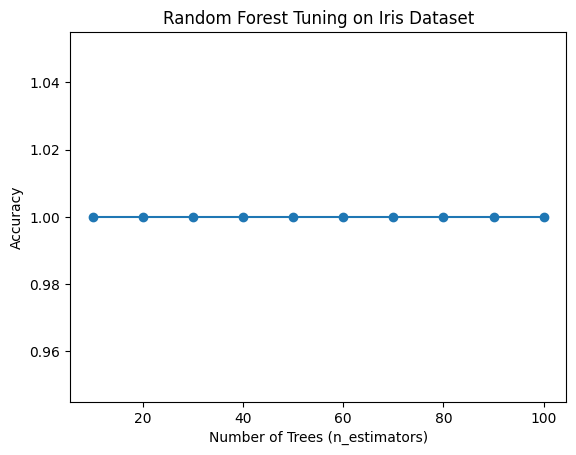

In [7]:
# Plot results
plt.plot(list(scores.keys()), list(scores.values()), marker='o')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Random Forest Tuning on Iris Dataset")
plt.show()